In [3]:
import numpy as np
from scipy.special import softmax
import torch
import torchvision
import torchvision.datasets as datasets
from sklearn.datasets import fetch_openml
import random


In [28]:
#source: https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-one-hot-encoded-array-in-numpy
# mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
# mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
mnist = fetch_openml('mnist_784')





/Users/emmagraham/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [108]:
x_train , x_test = mnist.data[:60000], mnist.data[60000:]
y_train , y_test = mnist.target[:60000], mnist.target[60000:]

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy().astype(np.int)
y_test = y_test.to_numpy().astype(np.int)

b = np.zeros((y_train.size, y_train.max() + 1))
b[np.arange(y_train.size), y_train] = 1
y_train_oh = b

b = np.zeros((y_test.size, y_test.max() + 1))
b[np.arange(y_test.size), y_test] = 1
y_test_oh = b

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_2275/572726787.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = y_train.to_numpy().astype(np.int)
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_2275/572726787.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_2275/2899887129.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(10, 300)

In [130]:
#Part 4
#Build neural network
## Written by: Emma Graham Linck
## Attribution: Ruochun Zhang's CS540 P1 Solution 2022 and Hongtao Hao's CS540 P1 Solution 2021

#need to add column of ones to training and testing data 

## number of units in the hidden layer
#num_epochs = 2


# number of units in the input layer, i.e., 784


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(o):
    return o * (1 - o)
 
# adjust alpha and number of epochs by yourself

def nnet(train_x, train_y, num_epochs, num_train, test_x, test_y, epochs, alpha, d1, k, initialization):
    d1 = d1
    d = train_x.shape[1]
    k = k
    num_train = len(train_y)
    num_test = len(test_y)
    nn_results_df = pd.DataFrame(columns = ('epoch', 'accuracy_test'))
    if initialization=="uniform":
        w1 = np.random.uniform(low=-1, high = 1, size = (d1, d))
        w2 = np.random.uniform(low=-1, high = 1, size = (k, d1))
    else:
        w1 = np.zeros(shape = (d1, d))
        w2 = np.zeros(shape = (k, d1))
#    b1 = np.random.uniform(low=-1, high = 1, size = (, 1))
#    b2 = np.random.uniform(low=-1, high = 1, size = (1, 1))
    
    # set a large number as the initial cost to be compared with in the 1st iteration
    loss_previous = 10e10
    
    for epoch in range(1, epochs+1):
        # shuffle the dataset
        train_index = random.sample(sorted(np.arange(num_train)), 32)
        for i in train_index:
            # a1 will be of the dimension of d1 * 1
            a1 = sigmoid(w1 @ x_train[i,:].reshape(784,1))
            # z is a k*1 matrix
            z = w2 @ a1
            # g is a k*1 matrix
            g = softmax(z)
            # dCdw1 will be a d1 * d matrix
    
            #a = np.tile(x_train[i,], (300,1))
            #.resize(300, 784)
            dCdw1 = (((g-(y_train_oh[i].reshape(k, 1))).T)@w2).T@sigmoid_derivative(a1).T@np.tile(x_train[i,:], (300, 1))
            #
            dCdw2 = (g-(y_train_oh[i].reshape(k, 1)))@a1.T

            # update w1, b1, w2, b2
            w1 = w1 - alpha*dCdw1
            w2 = w2- alpha*dCdw2
        # the output of the hidden layer will be a num_train * d1 matrix
        #train
        out_h = sigmoid(train_x @ w1.T)
        # the output of the output layer will be a num_train * 10 matrix
        out_o = softmax(out_h @ w2.T)
        preds = np.argmax(out_o, axis=1)
        truth = np.argmax(train_y, axis = 1)
#         loss = .5*np.sum(np.square(y.reshape(-1,1)-out_o))
#         loss_reduction = loss_previous - loss
#         loss_previous = loss
        correct = sum(preds == truth)
        accuracy = (correct / num_train)
#         print('epoch = ', epoch, ' loss = {:.7}'.format(loss), \
#               ' loss reduction = {:.7}'.format(loss_reduction), \
#               ' correctly classified = {:.4%}'.format(accuracy))
        out_h_test = sigmoid(test_x @w1.T)
        out_o_test = softmax(out_h_test @w2.T)
        preds_test = np.argmax(out_o_test, axis=1)
        truth_test = np.argmax(test_y, axis = 1)
        correct_test = sum(preds_test == truth_test)
        accuracy_test = (correct_test / num_test)
        nn_results_df = pd.concat([nn_results_df, pd.DataFrame({'epoch': [epoch], 'accuracy_test': [accuracy_test]})])
        print(nn_results_df)
        print('epoch = ', epoch,  \
               ' correctly classified train = {:.4%}'.format(accuracy), ' correctly classified test = {:.4%}'.format(accuracy_test))
       # if abs(loss_reduction) < 0.001:
       #     break 
        
    return w1, w2, out_o, nn_results_df
#w1 = np.random.uniform(low=-1, high = 1, size = (d, d1))
#w2 = np.random.uniform(low=-1, high = 1, size = (d1, k))
#a1 = sigmoid(w1.T @ x_train[i,:].reshape(785,1))
#l = (((g-(y_train_oh[i].reshape(k, 1))).T)@w2.T@sigmoid_derivative(a1)).item()*np.resize([x_train[i,:]], (785, 300))

#*np.resize([x_train[i,:]], (785, 300))
#l.shape
#@sigmoid_derivative(a1)@np.resize([x_train[i,:]], (785, 300))
#((((g-(y_train_oh[i].reshape(k, 1))).T)@w2.T).shape)

In [131]:
w1, w2, out_o, nn_results_test = nnet(x_train,
                                      y_train_oh,
                                      alpha,
                                      num_train, 
                                      x_test, 
                                      y_test_oh,
                                      epochs=500, 
                                      alpha=0.001, 
                                      d1=300,
                                      k=10, 
                                      initialization = "zeros"
                                     )

  epoch  accuracy_test
0     1         0.1135
epoch =  1  correctly classified train = 11.2367%  correctly classified test = 11.3500%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
epoch =  2  correctly classified train = 9.7517%  correctly classified test = 9.7400%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
epoch =  3  correctly classified train = 9.9300%  correctly classified test = 10.3200%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
epoch =  4  correctly classified train = 9.9300%  correctly classified test = 10.3200%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
epoch =  5  correctly classified train = 9.7517%  correctly classified test = 9.7400%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4       

  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
0     6         0.1028
0     7         0.1028
0     8         0.0974
0     9         0.1028
0    10         0.1032
0    11         0.0980
0    12         0.1010
0    13         0.1010
0    14         0.0980
0    15         0.1135
0    16         0.0958
0    17         0.1032
0    18         0.1032
0    19         0.0974
0    20         0.1028
0    21         0.0982
0    22         0.0982
0    23         0.0980
epoch =  23  correctly classified train = 9.8717%  correctly classified test = 9.8000%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
0     6         0.1028
0     7         0.1028
0     8         0.0974
0     9         0.1028
0    10         0.1032
0    11         0.0980
0    12         0.1010
0    13         0.1010
0    14         0.0980
0    15         

  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
0     6         0.1028
0     7         0.1028
0     8         0.0974
0     9         0.1028
0    10         0.1032
0    11         0.0980
0    12         0.1010
0    13         0.1010
0    14         0.0980
0    15         0.1135
0    16         0.0958
0    17         0.1032
0    18         0.1032
0    19         0.0974
0    20         0.1028
0    21         0.0982
0    22         0.0982
0    23         0.0980
0    24         0.0892
0    25         0.0982
0    26         0.1028
0    27         0.0974
0    28         0.0958
0    29         0.1009
0    30         0.0892
0    31         0.0982
0    32         0.1032
0    33         0.0980
0    34         0.1135
epoch =  34  correctly classified train = 11.2367%  correctly classified test = 11.3500%
  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4       

  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
0     6         0.1028
0     7         0.1028
0     8         0.0974
0     9         0.1028
0    10         0.1032
0    11         0.0980
0    12         0.1010
0    13         0.1010
0    14         0.0980
0    15         0.1135
0    16         0.0958
0    17         0.1032
0    18         0.1032
0    19         0.0974
0    20         0.1028
0    21         0.0982
0    22         0.0982
0    23         0.0980
0    24         0.0892
0    25         0.0982
0    26         0.1028
0    27         0.0974
0    28         0.0958
0    29         0.1009
0    30         0.0892
0    31         0.0982
0    32         0.1032
0    33         0.0980
0    34         0.1135
0    35         0.1010
0    36         0.1032
0    37         0.1028
0    38         0.0974
0    39         0.0974
0    40         0.1032
0    41         0.1135
0    42         0.1028
0    43    

  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
0     6         0.1028
0     7         0.1028
0     8         0.0974
0     9         0.1028
0    10         0.1032
0    11         0.0980
0    12         0.1010
0    13         0.1010
0    14         0.0980
0    15         0.1135
0    16         0.0958
0    17         0.1032
0    18         0.1032
0    19         0.0974
0    20         0.1028
0    21         0.0982
0    22         0.0982
0    23         0.0980
0    24         0.0892
0    25         0.0982
0    26         0.1028
0    27         0.0974
0    28         0.0958
0    29         0.1009
0    30         0.0892
0    31         0.0982
0    32         0.1032
0    33         0.0980
0    34         0.1135
0    35         0.1010
0    36         0.1032
0    37         0.1028
0    38         0.0974
0    39         0.0974
0    40         0.1032
0    41         0.1135
0    42         0.1028
0    43    

  epoch  accuracy_test
0     1         0.1135
0     2         0.0974
0     3         0.1032
0     4         0.1032
0     5         0.0974
0     6         0.1028
0     7         0.1028
0     8         0.0974
0     9         0.1028
0    10         0.1032
0    11         0.0980
0    12         0.1010
0    13         0.1010
0    14         0.0980
0    15         0.1135
0    16         0.0958
0    17         0.1032
0    18         0.1032
0    19         0.0974
0    20         0.1028
0    21         0.0982
0    22         0.0982
0    23         0.0980
0    24         0.0892
0    25         0.0982
0    26         0.1028
0    27         0.0974
0    28         0.0958
0    29         0.1009
0    30         0.0892
0    31         0.0982
0    32         0.1032
0    33         0.0980
0    34         0.1135
0    35         0.1010
0    36         0.1032
0    37         0.1028
0    38         0.0974
0    39         0.0974
0    40         0.1032
0    41         0.1135
0    42         0.1028
0    43    

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0     67         0.1135
0     68         0.0982
0     69         0.0982
0     70         0.0892
0     71         0.0980

[71 rows x 2 columns]
epoch =  71  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0     68         0.0982
0     69         0.0982
0     70         0.0892
0     71         0.0980
0     72         0.1028

[72 rows x 2 columns]
epoch =  72  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0     69         0.0982
0     70  

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0     88         0.0982
0     89         0.1010
0     90         0.1010
0     91         0.0974
0     92         0.0982

[92 rows x 2 columns]
epoch =  92  correctly classified train = 9.7367%  correctly classified test = 9.8200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0     89         0.1010
0     90         0.1010
0     91         0.0974
0     92         0.0982
0     93         0.0980

[93 rows x 2 columns]
epoch =  93  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0     90         0.1010
0     91    

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    109         0.1010
0    110         0.0974
0    111         0.0974
0    112         0.1028
0    113         0.1028

[113 rows x 2 columns]
epoch =  113  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    110         0.0974
0    111         0.0974
0    112         0.1028
0    113         0.1028
0    114         0.0892

[114 rows x 2 columns]
epoch =  114  correctly classified train = 9.0350%  correctly classified test = 8.9200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    111         0.0974
0    1

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    130         0.1010
0    131         0.0982
0    132         0.1135
0    133         0.1032
0    134         0.0982

[134 rows x 2 columns]
epoch =  134  correctly classified train = 9.7367%  correctly classified test = 9.8200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    131         0.0982
0    132         0.1135
0    133         0.1032
0    134         0.0982
0    135         0.1032

[135 rows x 2 columns]
epoch =  135  correctly classified train = 9.9300%  correctly classified test = 10.3200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    132         0.1135
0    13

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    151         0.1028
0    152         0.0980
0    153         0.1135
0    154         0.1135
0    155         0.1032

[155 rows x 2 columns]
epoch =  155  correctly classified train = 9.9300%  correctly classified test = 10.3200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    152         0.0980
0    153         0.1135
0    154         0.1135
0    155         0.1032
0    156         0.0980

[156 rows x 2 columns]
epoch =  156  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    153         0.1135
0    15

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    172         0.1009
0    173         0.0892
0    174         0.1028
0    175         0.1028
0    176         0.0980

[176 rows x 2 columns]
epoch =  176  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    173         0.0892
0    174         0.1028
0    175         0.1028
0    176         0.0980
0    177         0.0980

[177 rows x 2 columns]
epoch =  177  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    174         0.1028
0    175

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    193         0.1135
0    194         0.1032
0    195         0.1032
0    196         0.0982
0    197         0.1009

[197 rows x 2 columns]
epoch =  197  correctly classified train = 9.9150%  correctly classified test = 10.0900%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    194         0.1032
0    195         0.1032
0    196         0.0982
0    197         0.1009
0    198         0.1010

[198 rows x 2 columns]
epoch =  198  correctly classified train = 10.2183%  correctly classified test = 10.1000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    195         0.1032
0    

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    214         0.0980
0    215         0.1032
0    216         0.1009
0    217         0.1032
0    218         0.1028

[218 rows x 2 columns]
epoch =  218  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    215         0.1032
0    216         0.1009
0    217         0.1032
0    218         0.1028
0    219         0.0980

[219 rows x 2 columns]
epoch =  219  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    216         0.1009
0    2

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    235         0.1028
0    236         0.1009
0    237         0.0980
0    238         0.0958
0    239         0.1010

[239 rows x 2 columns]
epoch =  239  correctly classified train = 10.2183%  correctly classified test = 10.1000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    236         0.1009
0    237         0.0980
0    238         0.0958
0    239         0.1010
0    240         0.1010

[240 rows x 2 columns]
epoch =  240  correctly classified train = 10.2183%  correctly classified test = 10.1000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    237         0.0980
0   

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    256         0.0974
0    257         0.1135
0    258         0.1135
0    259         0.1028
0    260         0.1010

[260 rows x 2 columns]
epoch =  260  correctly classified train = 10.2183%  correctly classified test = 10.1000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    257         0.1135
0    258         0.1135
0    259         0.1028
0    260         0.1010
0    261         0.0892

[261 rows x 2 columns]
epoch =  261  correctly classified train = 9.0350%  correctly classified test = 8.9200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    258         0.1135
0    2

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    277         0.0980
0    278         0.0892
0    279         0.1032
0    280         0.1032
0    281         0.1028

[281 rows x 2 columns]
epoch =  281  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    278         0.0892
0    279         0.1032
0    280         0.1032
0    281         0.1028
0    282         0.0982

[282 rows x 2 columns]
epoch =  282  correctly classified train = 9.7367%  correctly classified test = 9.8200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    279         0.1032
0    2

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    298         0.0974
0    299         0.1032
0    300         0.1032
0    301         0.0980
0    302         0.1135

[302 rows x 2 columns]
epoch =  302  correctly classified train = 11.2367%  correctly classified test = 11.3500%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    299         0.1032
0    300         0.1032
0    301         0.0980
0    302         0.1135
0    303         0.1135

[303 rows x 2 columns]
epoch =  303  correctly classified train = 11.2367%  correctly classified test = 11.3500%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    300         0.1032
0   

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    319         0.0982
0    320         0.1032
0    321         0.1028
0    322         0.1032
0    323         0.1135

[323 rows x 2 columns]
epoch =  323  correctly classified train = 11.2367%  correctly classified test = 11.3500%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    320         0.1032
0    321         0.1028
0    322         0.1032
0    323         0.1135
0    324         0.1028

[324 rows x 2 columns]
epoch =  324  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    321         0.1028
0   

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    340         0.0980
0    341         0.0958
0    342         0.0892
0    343         0.1009
0    344         0.1028

[344 rows x 2 columns]
epoch =  344  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    341         0.0958
0    342         0.0892
0    343         0.1009
0    344         0.1028
0    345         0.0892

[345 rows x 2 columns]
epoch =  345  correctly classified train = 9.0350%  correctly classified test = 8.9200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    342         0.0892
0    3

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    361         0.1135
0    362         0.0974
0    363         0.1010
0    364         0.1135
0    365         0.0982

[365 rows x 2 columns]
epoch =  365  correctly classified train = 9.7367%  correctly classified test = 9.8200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    362         0.0974
0    363         0.1010
0    364         0.1135
0    365         0.0982
0    366         0.0980

[366 rows x 2 columns]
epoch =  366  correctly classified train = 9.8717%  correctly classified test = 9.8000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    363         0.1010
0    364

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    382         0.1032
0    383         0.1009
0    384         0.1028
0    385         0.0980
0    386         0.1032

[386 rows x 2 columns]
epoch =  386  correctly classified train = 9.9300%  correctly classified test = 10.3200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    383         0.1009
0    384         0.1028
0    385         0.0980
0    386         0.1032
0    387         0.1010

[387 rows x 2 columns]
epoch =  387  correctly classified train = 10.2183%  correctly classified test = 10.1000%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    384         0.1028
0    

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    403         0.1009
0    404         0.1009
0    405         0.0982
0    406         0.1135
0    407         0.1032

[407 rows x 2 columns]
epoch =  407  correctly classified train = 9.9300%  correctly classified test = 10.3200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    404         0.1009
0    405         0.0982
0    406         0.1135
0    407         0.1032
0    408         0.0974

[408 rows x 2 columns]
epoch =  408  correctly classified train = 9.7517%  correctly classified test = 9.7400%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    405         0.0982
0    40

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    424         0.1009
0    425         0.0892
0    426         0.1009
0    427         0.1010
0    428         0.0982

[428 rows x 2 columns]
epoch =  428  correctly classified train = 9.7367%  correctly classified test = 9.8200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    425         0.0892
0    426         0.1009
0    427         0.1010
0    428         0.0982
0    429         0.0982

[429 rows x 2 columns]
epoch =  429  correctly classified train = 9.7367%  correctly classified test = 9.8200%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    426         0.1009
0    427

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    445         0.1135
0    446         0.0974
0    447         0.1032
0    448         0.0974
0    449         0.0958

[449 rows x 2 columns]
epoch =  449  correctly classified train = 9.8633%  correctly classified test = 9.5800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    446         0.0974
0    447         0.1032
0    448         0.0974
0    449         0.0958
0    450         0.1135

[450 rows x 2 columns]
epoch =  450  correctly classified train = 11.2367%  correctly classified test = 11.3500%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    447         0.1032
0    4

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    466         0.1028
0    467         0.1028
0    468         0.1028
0    469         0.1028
0    470         0.1028

[470 rows x 2 columns]
epoch =  470  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    467         0.1028
0    468         0.1028
0    469         0.1028
0    470         0.1028
0    471         0.1009

[471 rows x 2 columns]
epoch =  471  correctly classified train = 9.9150%  correctly classified test = 10.0900%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    468         0.1028
0    

   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    487         0.1032
0    488         0.1009
0    489         0.0892
0    490         0.1135
0    491         0.1028

[491 rows x 2 columns]
epoch =  491  correctly classified train = 10.4417%  correctly classified test = 10.2800%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    488         0.1009
0    489         0.0892
0    490         0.1135
0    491         0.1028
0    492         0.1009

[492 rows x 2 columns]
epoch =  492  correctly classified train = 9.9150%  correctly classified test = 10.0900%
   epoch  accuracy_test
0      1         0.1135
0      2         0.0974
0      3         0.1032
0      4         0.1032
0      5         0.0974
..   ...            ...
0    489         0.0892
0    

In [150]:
#plot learning curve
#uniform_500_by_myself = nn_results_test
#nn_results_test.to_csv("./uniform_500_by_myself_test_results.csv")

# zeros_500_by_myself = nn_results_test
# zeros_500_by_myself.to_csv("./zeros_500_by_myself_test_results.csv")
uniform_500_by_myself

,epoch,accuracy_test
0,1,0.1970
0,2,0.2901
0,3,0.4448
0,4,0.3312
0,5,0.4496
...,...,...
0,496,0.8357
0,497,0.8398
0,498,0.8438
0,499,0.8364


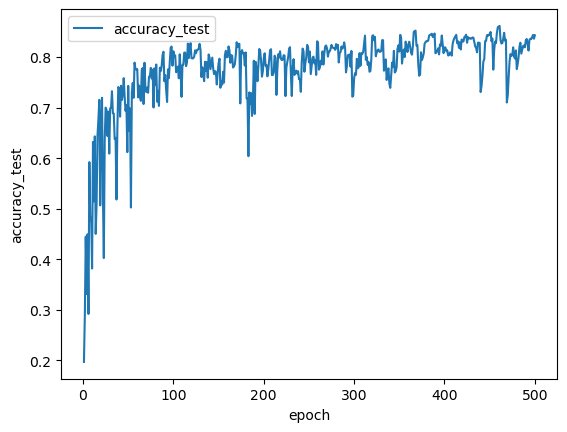

In [143]:
uniform_500_by_myself
uniform_500_by_myself.plot("epoch", "accuracy_test")
plt.xlabel("epoch")
plt.ylabel("accuracy_test")
plt.savefig("./HW4_760_myself_epoch_accuracy_uniform.png")

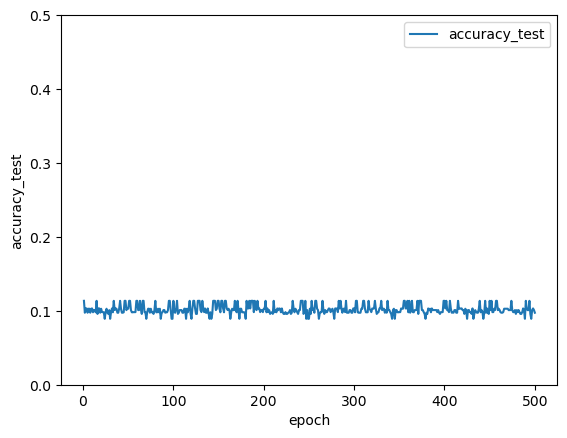

In [146]:
zeros_500_by_myself.plot("epoch", "accuracy_test")
plt.xlabel("epoch")
plt.ylabel("accuracy_test")
plt.ylim(0, 0.5)
plt.savefig("./HW4_760_myself_epoch_accuracy_zeros.png")

In [147]:
#coding with PyTorch
#source: https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/

import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# mnist = fetch_openml('mnist_784')
# X = mnist.data
# Y = mnist.target


# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(Y)
# y = ohe.transform(y)

#x_train , x_test = mnist.data[:60000], mnist.data[60000:]
#y_train , y_test = mnist.target[:60000], mnist.target[60000:]

# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_oh, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_oh, dtype=torch.float32)
 
print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)
d = 784
d1 = 300
k = 10
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(d, d1, bias = False)
        self.sigmoid = nn.Sigmoid()
        self.output = nn.Linear(d1, k, bias = False)
 
    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.output(x)
        return x
#loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
# # prepare model and training parameters
n_epochs = 10
batch_size = 32
batches_per_epoch = len(x_train_tensor) // batch_size
 
best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = x_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
     # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(x_test_tensor)
    ce = loss_fn(y_pred, y_test_tensor)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test_tensor, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")
 

torch.Size([60000, 784])
torch.Size([60000, 10])
torch.Size([10000, 784])
torch.Size([10000, 10])


Epoch 0:  80%|████▊ | 1498/1875 [00:02<00:00, 674.40batch/s, acc=0.719, loss=1.01]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 1: 100%|█████████| 1875/1875 [00:02<00:00, 652.07batch/s, acc=1, loss=0.312]


Epoch 1 validation: Cross-entropy=0.46, Accuracy=89.9%


Epoch 2:   8%|▍     | 148/1875 [00:00<00:02, 611.33batch/s, acc=0.906, loss=0.498]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 2: 100%|█████| 1875/1875 [00:02<00:00, 705.40batch/s, acc=0.969, loss=0.227]


Epoch 2 validation: Cross-entropy=0.38, Accuracy=90.9%


Epoch 3:  32%|█▉    | 608/1875 [00:00<00:01, 674.22batch/s, acc=0.938, loss=0.236]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 3: 100%|█████| 1875/1875 [00:02<00:00, 718.06batch/s, acc=0.969, loss=0.176]


Epoch 3 validation: Cross-entropy=0.33, Accuracy=91.6%


Epoch 4:  61%|███  | 1149/1875 [00:01<00:01, 665.23batch/s, acc=0.906, loss=0.402]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 5:  90%|████▌| 1688/1875 [00:02<00:00, 617.78batch/s, acc=0.875, loss=0.431]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 6: 100%|█████████| 1875/1875 [00:02<00:00, 672.16batch/s, acc=1, loss=0.114]


Epoch 6 validation: Cross-entropy=0.27, Accuracy=92.7%


Epoch 7:  16%|█▏     | 302/1875 [00:00<00:02, 538.30batch/s, acc=0.938, loss=0.26]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 7: 100%|████████| 1875/1875 [00:02<00:00, 658.58batch/s, acc=1, loss=0.0978]


Epoch 7 validation: Cross-entropy=0.26, Accuracy=93.0%


Epoch 8:  36%|██▏   | 679/1875 [00:01<00:01, 668.50batch/s, acc=0.969, loss=0.186]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Epoch 8: 100%|████████| 1875/1875 [00:02<00:00, 705.65batch/s, acc=1, loss=0.0872]


Epoch 8 validation: Cross-entropy=0.25, Accuracy=93.2%


Epoch 9:  63%|███▏ | 1181/1875 [00:01<00:01, 629.80batch/s, acc=0.969, loss=0.149]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



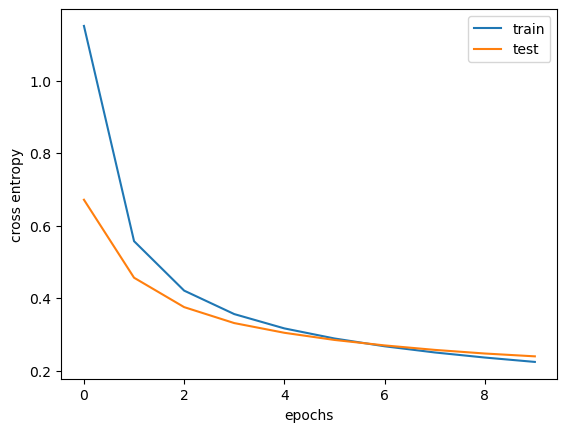

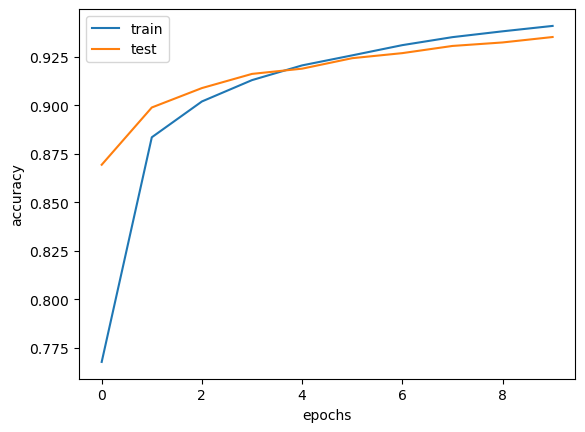

In [148]:
# Restore best model
model.load_state_dict(best_weights)
 
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig("./HW4_760_pytorch_epoch_accuracy.png")

In [6]:
#Part 3
from collections import Counter
import string
import re
import os
import pandas as pd

letters = list(string.ascii_lowercase + ' ')
og_dict = {key: None for key in letters}
print(og_dict)

#df = pd.DataFrame({'doc', 'language', 'letter', 'count'})
def extract_prob_from_document(file_name):
    #read in file
    full_name = "./languageID/" + str(file_name.decode())
    file = open(full_name)
    lines = [line.strip() for line in file.readlines() if line.strip()]
    file.close()
    a = [list(string) for string in lines]
    flat_list = [item for sublist in a for item in sublist]
    counts = Counter(flat_list)
    count_df = dict(counts)
    new_dict = og_dict | count_df
    df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index().fillna(0)
    df['language'] = list(file_name.decode())[0]
    file_number = re.findall(r'\d+', file_name.decode())
    df['doc_number'] = file_number[0]
    return df

# def laplace_smoothing(x):


# iterate through all files


directory = os.fsencode("./languageID/")
og_df = pd.DataFrame(columns = ('index', 0, 'language', 'doc_number'))
for file in os.listdir(directory):
    og_df = pd.concat([og_df, extract_prob_from_document(file)])
    
print(og_df)

{'a': None, 'b': None, 'c': None, 'd': None, 'e': None, 'f': None, 'g': None, 'h': None, 'i': None, 'j': None, 'k': None, 'l': None, 'm': None, 'n': None, 'o': None, 'p': None, 'q': None, 'r': None, 's': None, 't': None, 'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None, ' ': None}
   index      0 language doc_number
0      a  223.0        j          5
1      b   20.0        j          5
2      c   10.0        j          5
3      d   27.0        j          5
4      e   88.0        j          5
..   ...    ...      ...        ...
22     w   36.0        e          7
23     x    3.0        e          7
24     y   30.0        e          7
25     z    0.0        e          7
26        465.0        e          7

[1620 rows x 4 columns]


In [8]:
#calculate class probabilities
all_items = pd.DataFrame(og_df)
all_items = all_items.rename(columns = {"index": "index", 0: "count", "language": "language", "doc_number": "doc_number"})
all_items['doc_number'] = all_items.doc_number.astype(int)
data = all_items.loc[all_items["doc_number"] < 10]
def laplace_smoothing(num, denom, lam, n_y):
    logp = np.log(num + lam) - np.log(denom + n_y*lam)
    return (np.exp(logp))
y_unique = data.language.unique()
prior_probability = np.zeros(len(data.language.unique()))
for i in range(0,len(y_unique)):
    #prior_probability[i]=(sum(data['language']==y_unique[i])+0.5)/(len(data['language']) + 3*(0.5))
    prior_probability[i]=laplace_smoothing(num = sum(data['language']==y_unique[i]), denom = (len(data['language'])), lam = 1/2, n_y = 3)

    
prior_probability
    # Step 2: Calculate Conditional Probability
conditional_probability = {}
#for i in range(1,data.shape[1]):
x_unique = list(set(data['index']))

x_conditional_probability = np.zeros((len(data.language.unique()),len(set(data['index']))))
for j in range(0,len(y_unique)):
    for k in range(0,len(x_unique)):
        x_conditional_probability[j,k]=laplace_smoothing(num = sum(data.loc[(data['index']==x_unique[k])&(data['language']==y_unique[j]),"count"]), denom = sum(data.loc[(data['language']==y_unique[j]),"count"]), lam = 0.5, n_y = 27)
x_conditional_probability = pd.DataFrame(x_conditional_probability,columns=x_unique,index=y_unique) 

In [22]:
#get test set e10.txt
all_items = pd.DataFrame(og_df)
all_items = all_items.rename(columns = {"index": "index", 0: "count", "language": "language", "doc_number": "doc_number"})
e10 = all_items.loc[(all_items['doc_number']=="10") & (all_items['language']=="e")]
e10

cond = x_conditional_probability.T
cond.index.name = 'index'
cond.reset_index(inplace = True)
cond
#df1.merge(df2, left_on='lkey', right_on='rkey')
new = e10.merge(cond, left_on='index', right_on='index')
new['logp_j'] = np.log(new['j'])
new['logp_s'] = np.log(new['s'])
new['logp_e'] = np.log(new['e'])
new['count_logp_j'] = new['count']*new['logp_j']
new['count_logp_s'] = new['count']*new['logp_s']
new['count_logp_e'] = new['count']*new['logp_e']
new['log_p_x_j'] = sum(new['count_logp_j'])
new['log_p_x_s'] = sum(new['count_logp_s'])
new['log_p_x_e'] = sum(new['count_logp_e'])

prior_e = np.log(0.33333)
prior_j = np.log(0.33333)
prior_s = np.log(0.33333)
p_eng_x = prior_e + new['log_p_x_e'].unique()
p_jap_x = prior_j + new['log_p_x_j'].unique()
p_spa_x = prior_j + new['log_p_x_s'].unique()
#logpxe greater than  others so predict English
print(p_eng_x)
print(p_jap_x)
print(p_spa_x)
print(new)

#exp(log_p_eng_x) > exp(log_p_jap_x) > exp(log_p_spa_x)
#therefore predict english
print(e10.loc[:,["index", "count"]].to_latex())

[-7832.63032485]
[-8787.149727]
[-8458.13832789]
   index  count language doc_number         j         s         e     logp_j  \
0      a  164.0        e         10  0.134175  0.104832  0.060240  -2.008607   
1      b   32.0        e         10  0.011066  0.008254  0.011148  -4.503910   
2      c   53.0        e         10  0.005586  0.037623  0.021536  -5.187457   
3      d   57.0        e         10  0.017541  0.039849  0.021999  -4.043194   
4      e  311.0        e         10  0.061306  0.114106  0.105495  -2.791881   
5      f   55.0        e         10  0.003949  0.008625  0.018955  -5.534173   
6      g   51.0        e         10  0.014268  0.007203  0.017500  -4.249741   
7      h  140.0        e         10  0.032343  0.004544  0.047272  -3.431358   
8      i  140.0        e         10  0.098808  0.049989  0.055477  -2.314576   
9      j    3.0        e         10  0.002384  0.006647  0.001422  -6.039010   
10     k    6.0        e         10  0.058459  0.000278  0.003738  -2.8

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_2275/2832767480.py:37: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(e10.loc[:,["index", "count"]].to_latex())


In [10]:
test_set = og_df.loc[og_df['doc_number'] >= 10]
print(test_set)
test_set = test_set.rename(columns = {"index": "index", 0: "count", "language": "language", "doc_number": "doc_number"})
def predict_class(language, doc_number):
    data = test_set.loc[(test_set['language'] == language) & (test_set['doc_number'] == doc_number)]
    new = data.merge(cond, left_on='index', right_on='index')
    new['logp_j'] = np.log(new['j'])
    new['logp_s'] = np.log(new['s'])
    new['logp_e'] = np.log(new['e'])
    new['count_logp_j'] = new['count']*new['logp_j']
    new['count_logp_s'] = new['count']*new['logp_s']
    new['count_logp_e'] = new['count']*new['logp_e']
    new['log_p_x_j'] = sum(new['count_logp_j'])
    new['log_p_x_s'] = sum(new['count_logp_s'])
    new['log_p_x_e'] = sum(new['count_logp_e'])

    prior_e = np.log(0.33333)
    prior_j = np.log(0.33333)
    prior_s = np.log(0.33333)
    new['p_eng_x'] = np.repeat((prior_e + new['log_p_x_e'].unique()), 27)
    new['p_jap_x'] = np.repeat((prior_j + new['log_p_x_j'].unique()), 27)
    new['p_spa_x'] = np.repeat((prior_j + new['log_p_x_s'].unique()), 27)
    
    results = new.loc[:, ["p_eng_x", "p_jap_x", "p_spa_x"]]
    top_pred = np.unique(results.to_numpy().argmax(axis=1))
    print(top_pred)
    print(type(results))
    num = top_pred[0]
    print(num)
    pred = list(results.columns)[num]
    print(pred)
    new['top_pred'] = pred[2]
    new['class'] = np.repeat((pred[2] + "_" + new['language'].unique()), 27)
    return new


final_df = pd.DataFrame()
for lang in test_set['language'].unique():
    for doc in test_set['doc_number'].unique():
        final_df = pd.concat([final_df, predict_class(lang, doc)])
    

print(final_df)




TypeError: '>=' not supported between instances of 'str' and 'int'

In [512]:
final_condensed = final_df.loc[:, ["language", "doc_number", "top_pred", "class"]].drop_duplicates()
final_condensed

confusion_matrix = pd.DataFrame({'Pred': ['English', 'Spanish', 'Japanese'],'English':[10, 0, 0], 'Spanish': [0, 10, 0], 'Japanese': [0, 0, 10]},)
print(confusion_matrix.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &      Pred &  English &  Spanish &  Japanese \\
\midrule
0 &   English &       10 &        0 &         0 \\
1 &   Spanish &        0 &       10 &         0 \\
2 &  Japanese &        0 &        0 &        10 \\
\bottomrule
\end{tabular}



/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_49955/1161057536.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(confusion_matrix.to_latex())


In [152]:
test_acc_hist

[0.8693000078201294,
 0.8988000154495239,
 0.9088000059127808,
 0.916100025177002,
 0.9187999963760376,
 0.9241999983787537,
 0.926800012588501,
 0.9304999709129333,
 0.9322999715805054,
 0.9351000189781189]

In [12]:
print(x_conditional_probability.T.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &         j &         s &         e \\
index &           &           &           \\
\midrule
s     &  0.042946 &  0.065941 &  0.066261 \\
l     &  0.001459 &  0.053081 &  0.029012 \\
i     &  0.098808 &  0.049989 &  0.055477 \\
g     &  0.014268 &  0.007203 &  0.017500 \\
j     &  0.002384 &  0.006647 &  0.001422 \\
v     &  0.000249 &  0.005905 &  0.009296 \\
d     &  0.017541 &  0.039849 &  0.021999 \\
z     &  0.007863 &  0.002690 &  0.000629 \\
p     &  0.000890 &  0.024330 &  0.016772 \\
q     &  0.000107 &  0.007698 &  0.000562 \\
x     &  0.000036 &  0.002504 &  0.001158 \\
c     &  0.005586 &  0.037623 &  0.021536 \\
w     &  0.020103 &  0.000093 &  0.015515 \\
e     &  0.061306 &  0.114106 &  0.105495 \\
o     &  0.092830 &  0.072681 &  0.064541 \\
a     &  0.134175 &  0.104832 &  0.060240 \\
r     &  0.043587 &  0.059449 &  0.053889 \\
k     &  0.058459 &  0.000278 &  0.003738 \\
      &  0.107419 &  0.166105 &  0.178273 \\
b     &  0.011066 

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_2275/2836320180.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(x_conditional_probability.T.to_latex())


0.15680000000000005